## Aprendizado Supervisionado

Prática com KNN e Iris

In [1]:
# pacotes básicos
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pacotes do sklearn para acesso a datasets, preparação, modelagem e avaliação
from sklearn import datasets
# pacote pipeline para combinar preparação e modelagem
from sklearn.pipeline import Pipeline, make_pipeline
# arsenal de preparação
from sklearn.preprocessing import MinMaxScaler # rescala em min-max
from sklearn.preprocessing import StandardScaler # padroniza features removendo média e 
#     escalando para variância unitária. Também chamado de z-score
#
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as CMD

#pacotes para apoio a leitura e gravação de datasets
from pathlib import Path
import csv
import pprint

In [2]:
# carga de dados 
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# separação em features e target
X = iris.data
y = iris.target
iris_entrada = pd.DataFrame({'sepallength': X[:, 0], 
                             'sepalwidth': X[:, 1], 
                             'petallength': X[:, 2], 
                             'petalwidth': X[:, 3], 
                             'class': y})

In [4]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# separação em treino e teste, e X e y
# importante fazer ANTES do pipeline para evitar data leakage

treino_X, teste_X, treino_y, teste_y = tts(X, y, random_state=0,test_size=0.3, stratify=y)

print(treino_X.shape)
print(treino_y.shape)
print(teste_X.shape)
print(teste_y.shape)
print(np.stack(np.unique(teste_y, return_counts=True), axis=1))

(105, 4)
(105,)
(45, 4)
(45,)
[[ 0 15]
 [ 1 15]
 [ 2 15]]


In [7]:
treino = pd.DataFrame({'sepallength': treino_X[:, 0], 
                       'sepalwidth': treino_X[:, 1], 
                       'petallength': treino_X[:, 2], 
                       'petalwidth': treino_X[:, 3], 
                       'class': treino_y})

teste = pd.DataFrame({'sepallength': teste_X[:, 0], 
                      'sepalwidth': teste_X[:, 1], 
                      'petallength': teste_X[:, 2], 
                      'petalwidth': teste_X[:, 3], 
                      'class': teste_y})

In [8]:
iris_shuffled = pd.concat([treino, teste], ignore_index=True)
print(iris_shuffled.to_string())

     sepallength  sepalwidth  petallength  petalwidth  class
0            6.7         3.3          5.7         2.5      2
1            7.7         3.8          6.7         2.2      2
2            6.4         3.2          5.3         2.3      2
3            4.6         3.6          1.0         0.2      0
4            5.2         3.4          1.4         0.2      0
5            4.4         3.0          1.3         0.2      0
6            4.9         2.4          3.3         1.0      1
7            6.4         2.7          5.3         1.9      2
8            6.1         3.0          4.6         1.4      1
9            6.8         3.0          5.5         2.1      2
10           4.8         3.0          1.4         0.3      0
11           6.3         3.3          4.7         1.6      1
12           5.1         2.5          3.0         1.1      1
13           6.6         2.9          4.6         1.3      1
14           4.9         3.0          1.4         0.2      0
15           5.0        

k= 1   Acuracia= 0.9777777777777777
k= 3   Acuracia= 1.0
k= 5   Acuracia= 1.0
k= 7   Acuracia= 1.0
k= 9   Acuracia= 1.0
k= 11   Acuracia= 1.0
k= 13   Acuracia= 0.9777777777777777


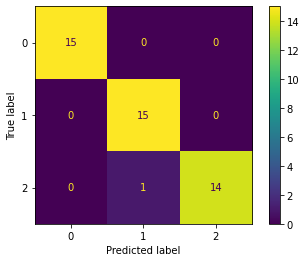

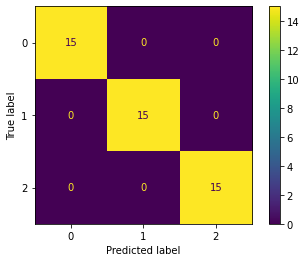

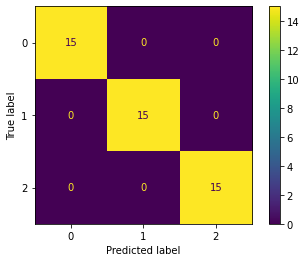

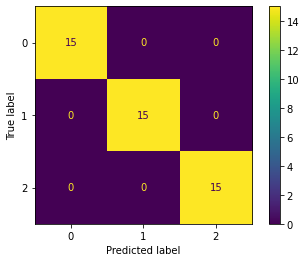

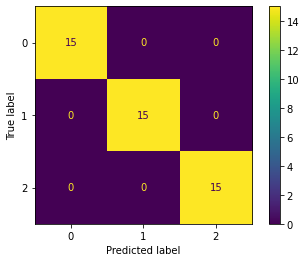

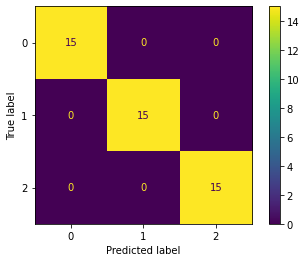

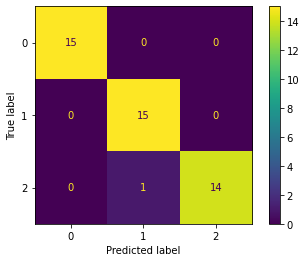

In [9]:
# indução do modelo para diferentes números de vizinhos

n_vizinhos = [1, 3, 5, 7, 9, 11, 13]

for n in n_vizinhos:
    modelo = knn(n_neighbors=n)
    modelo.fit(treino_X, treino_y)
    teste_pred_y = modelo.predict(teste_X)
    acuracia = acc_score(teste_y, teste_pred_y)
    resultado = cm(teste_y, teste_pred_y)
    cm_display = CMD(resultado).plot()
    print('k=', n,'  Acuracia=', acuracia)
    


### Preparação e modelagem, cuidando para não ocorrer data leakage


k= 1   Acuracia= 0.9777777777777777
k= 3   Acuracia= 0.9777777777777777
k= 5   Acuracia= 0.9777777777777777
k= 7   Acuracia= 0.9777777777777777
k= 9   Acuracia= 0.9777777777777777
k= 11   Acuracia= 0.9777777777777777
k= 13   Acuracia= 1.0


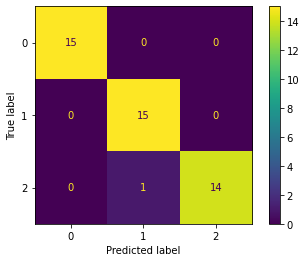

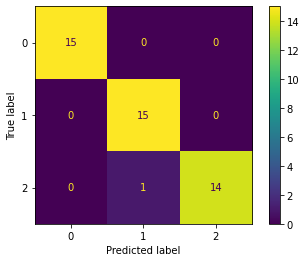

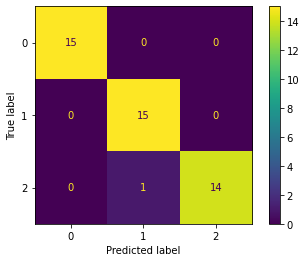

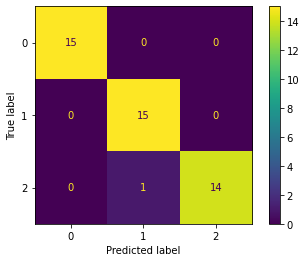

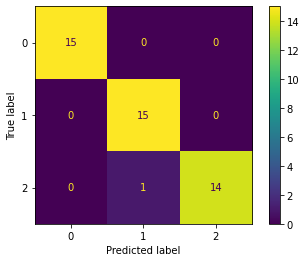

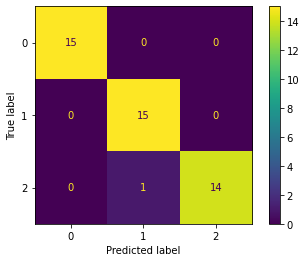

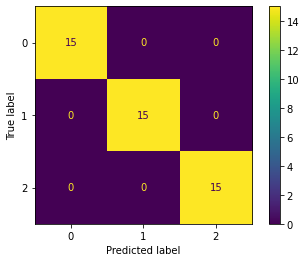

In [10]:
# protocolo experimental

n_vizinhos = [1, 3, 5, 7, 9, 11, 13]

for n in n_vizinhos:
  escalonador = MinMaxScaler()
  estimador = knn(n_neighbors= n)
  treino_X_escalonado = escalonador.fit_transform(treino_X, treino_y)
  estimador.fit(treino_X_escalonado, treino_y)
  teste_X_escalonado = escalonador.transform(teste_X)
  teste_pred_y = estimador.predict(teste_X_escalonado)
  acuracia = acc_score(teste_y, teste_pred_y)
  resultado = cm(teste_y, teste_pred_y)
  cm_display = CMD(resultado).plot()
  print('k=', n,'  Acuracia=', acuracia)

In [11]:
treino_escalonado = pd.DataFrame({'sepallength': treino_X_escalonado[:, 0], 
                                  'sepalwidth': treino_X_escalonado[:, 1], 
                                  'petallength': treino_X_escalonado[:, 2], 
                                  'petalwidth': treino_X_escalonado[:, 3], 
                                  'class': treino_y})

teste_escalonado = pd.DataFrame({'sepallength': teste_X_escalonado[:, 0], 
                                  'sepalwidth': teste_X_escalonado[:, 1], 
                                  'petallength': teste_X_escalonado[:, 2], 
                                  'petalwidth': teste_X_escalonado[:, 3], 
                                  'class': teste_y})

In [12]:
iris_escalonado = pd.concat([treino_escalonado, teste_escalonado], ignore_index=True)
print(iris_escalonado.to_string())

     sepallength  sepalwidth  petallength  petalwidth  class
0       0.666667    0.541667     0.796610    1.000000      2
1       0.944444    0.750000     0.966102    0.875000      2
2       0.583333    0.500000     0.728814    0.916667      2
3       0.083333    0.666667     0.000000    0.041667      0
4       0.250000    0.583333     0.067797    0.041667      0
5       0.027778    0.416667     0.050847    0.041667      0
6       0.166667    0.166667     0.389831    0.375000      1
7       0.583333    0.291667     0.728814    0.750000      2
8       0.500000    0.416667     0.610169    0.541667      1
9       0.694444    0.416667     0.762712    0.833333      2
10      0.138889    0.416667     0.067797    0.083333      0
11      0.555556    0.541667     0.627119    0.625000      1
12      0.222222    0.208333     0.338983    0.416667      1
13      0.638889    0.375000     0.610169    0.500000      1
14      0.166667    0.416667     0.067797    0.041667      0
15      0.194444    0.58